#Importing data from kaggle

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload() #this file will be, the api kaggle.json generated from your kaggle account.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.5MB/s]


In [ ]:
!mkdir ipl_data
!unzip ipldata.zip -d ipl_data

In [5]:
import pandas as pd
df = pd.read_csv('ipl_data/matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#Reading and Processing data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
df_mat = pd.read_csv('ipl_data/matches.csv')
df_mat.drop('umpire3',axis=1,inplace=True)
df_deliv = pd.read_csv('ipl_data/deliveries.csv')

In [7]:
df_mat['team1'].replace('Deccan Chargers', 'Sunrisers Hyderabad',inplace=True)
df_mat['team1'].replace('Delhi Daredevils','Delhi Capitals' ,inplace=True)
df_mat['team1'].replace('Kochi Tuskers Kerala', 'Sunrisers Hyderabad',inplace=True)
df_mat['team1'].replace('Pune Warriors','Chennai Super Kings' ,inplace=True)
df_mat['team1'].replace('Rising Pune Supergiant','Chennai Super Kings',inplace=True)
df_mat['team1'].replace('Rising Pune Supergiants','Chennai Super Kings',inplace=True)
df_mat['team1'].replace('Gujarat Lions','Chennai Super Kings',inplace=True)


In [8]:
df_mat['team2'].replace('Deccan Chargers', 'Sunrisers Hyderabad',inplace=True)
df_mat['team2'].replace('Delhi Daredevils','Delhi Capitals' ,inplace=True)
df_mat['team2'].replace('Kochi Tuskers Kerala', 'Sunrisers Hyderabad',inplace=True)
df_mat['team2'].replace('Pune Warriors','Chennai Super Kings' ,inplace=True)
df_mat['team2'].replace('Rising Pune Supergiant','Chennai Super Kings',inplace=True)
df_mat['team2'].replace('Gujarat Lions','Chennai Super Kings',inplace=True)
df_mat['team2'].replace('Rising Pune Supergiants','Chennai Super Kings',inplace=True)

In [9]:
df_mat['toss_winner'].replace('Deccan Chargers', 'Sunrisers Hyderabad',inplace=True)
df_mat['toss_winner'].replace('Delhi Daredevils','Delhi Capitals' ,inplace=True)
df_mat['toss_winner'].replace('Kochi Tuskers Kerala', 'Sunrisers Hyderabad',inplace=True)
df_mat['toss_winner'].replace('Pune Warriors','Chennai Super Kings' ,inplace=True)
df_mat['toss_winner'].replace('Gujarat Lions','Chennai Super Kings',inplace=True)
df_mat['toss_winner'].replace('Rising Pune Supergiant','Chennai Super Kings',inplace=True)
df_mat['toss_winner'].replace('Rising Pune Supergiants','Chennai Super Kings',inplace=True)

In [11]:
df_mat['winner'].replace('Deccan Chargers', 'Sunrisers Hyderabad',inplace=True)
df_mat['winner'].replace('Delhi Daredevils','Delhi Capitals' ,inplace=True)
df_mat['winner'].replace('Kochi Tuskers Kerala', 'Sunrisers Hyderabad',inplace=True)
df_mat['winner'].replace('Pune Warriors','Chennai Super Kings' ,inplace=True)
df_mat['winner'].replace('Rising Pune Supergiant','Chennai Super Kings',inplace=True)
df_mat['winner'].replace('Gujarat Lions','Chennai Super Kings',inplace=True)
df_mat['winner'].replace('Rising Pune Supergiants','Chennai Super Kings',inplace=True)

In [12]:
df_mat['winner'].fillna('Draw',inplace=True)

In [13]:
columns=['id', 'season', 'city', 'date', 'result', 'player_of_match', 'venue', 'umpire1', 'umpire2']


In [14]:
df_mat.drop(labels=columns,axis=1,inplace=True)

In [15]:
df_mat.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Delhi Capitals','Chennai Super Kings',
                 'Rajasthan Royals','Kings XI Punjab',
                 'Sunrisers Hyderabad']
                ,['MI','KKR','RCB','DC','CSK','RR','KXIP','SRH'],inplace=True)

In [16]:
toss=[]
win=[]
c=[]
d=[]
for i in df_mat['toss_winner']:
  toss.append(i)
for j in df_mat['winner']:
  win.append(j)
for k in range(len(df_mat)):
  if((toss[k])==(win[k])):
    c.append('yes')
  else:
    d.append('no') 


In [17]:
print("probability of the team that win the toss wins=",str(len(c)/757*100)+" %")

probability of the team that win the toss wins= 52.70805812417437 %


In [18]:
print("probability of the team that win the toss loses=",str(len(d)/757*100)+" %")

probability of the team that win the toss loses= 47.15984147952444 %


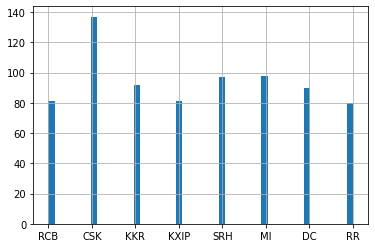

In [19]:
df_mat['toss_winner'].hist(bins=50)

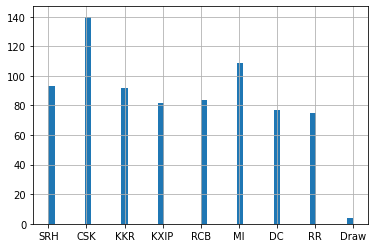

In [20]:
df_mat['winner'].hist(bins=50)

In [22]:
field_win=[]
bat_win=[]
toss_loss_field_win=[]
toss_loss_bat_win=[]
for k in range(len(df_mat['toss_decision'])):
  if(df_mat['toss_decision'][k]=='bat' and df_mat['toss_winner'][k]==df_mat['winner'][k]):
    bat_win.append('bat')
  elif(df_mat['toss_decision'][k]=='field' and df_mat['toss_winner'][k]==df_mat['winner'][k]):
    field_win.append('field')
  elif(df_mat['toss_decision'][k]=='field' and df_mat['toss_winner'][k]!=df_mat['winner'][k] and df_mat['winner'][k]!='Draw'):
    toss_loss_field_win.append('field')
  elif(df_mat['toss_decision'][k]=='bat' and df_mat['toss_winner'][k]!=df_mat['winner'][k] and df_mat['winner'][k]!='Draw'):
    toss_loss_bat_win.append('field')


In [23]:
print("probabilty of team that choose to field & won the toss will win=",str(len(field_win)/757 *100)+" %")

probabilty of team that choose to field & won the toss will win= 34.61030383091149 %


In [24]:
print("probabilty of team that choose to bat & won the toss will win=",str(len(bat_win)/757 *100)+" %")

probabilty of team that choose to bat & won the toss will win= 18.09775429326288 %


In [25]:
print("probabilty of team that choose to field & lose the toss will win=",str(len(toss_loss_field_win)/757 *100)+" %")

probabilty of team that choose to field & lose the toss will win= 26.1558784676354 %


In [26]:
print("probabilty of team that choose to bat & lose the toss will win=",str(len(toss_loss_bat_win)/757 *100)+" %")

probabilty of team that choose to bat & lose the toss will win= 20.47556142668428 %


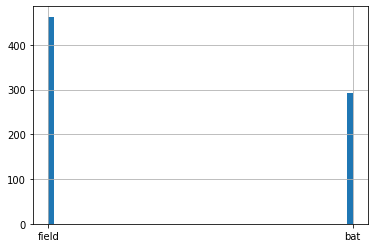

In [27]:
df_mat['toss_decision'].hist(bins=50)

In [28]:
df_mat['team1'].replace('CSK',0,inplace=True)
df_mat['team1'].replace('DC',1,inplace=True)
df_mat['team1'].replace('MI',2,inplace=True)
df_mat['team1'].replace('RR',3,inplace=True)
df_mat['team1'].replace('RCB',4,inplace=True)
df_mat['team1'].replace('KKR',5,inplace=True)
df_mat['team1'].replace('KXIP',6,inplace=True)
df_mat['team1'].replace('SRH',7,inplace=True)

In [29]:
df_mat['team2'].replace('CSK',0,inplace=True)
df_mat['team2'].replace('DC',1,inplace=True)
df_mat['team2'].replace('MI',2,inplace=True)
df_mat['team2'].replace('RR',3,inplace=True)
df_mat['team2'].replace('RCB',4,inplace=True)
df_mat['team2'].replace('KKR',5,inplace=True)
df_mat['team2'].replace('KXIP',6,inplace=True)
df_mat['team2'].replace('SRH',7,inplace=True)

In [30]:
df_mat['toss_winner'].replace('CSK',0,inplace=True)
df_mat['toss_winner'].replace('DC',1,inplace=True)
df_mat['toss_winner'].replace('MI',2,inplace=True)
df_mat['toss_winner'].replace('RR',3,inplace=True)
df_mat['toss_winner'].replace('RCB',4,inplace=True)
df_mat['toss_winner'].replace('KKR',5,inplace=True)
df_mat['toss_winner'].replace('KXIP',6,inplace=True)
df_mat['toss_winner'].replace('SRH',7,inplace=True)

In [31]:
df_mat['winner'].replace('CSK',0,inplace=True)
df_mat['winner'].replace('DC',1,inplace=True)
df_mat['winner'].replace('MI',2,inplace=True)
df_mat['winner'].replace('RR',3,inplace=True)
df_mat['winner'].replace('RCB',4,inplace=True)
df_mat['winner'].replace('KKR',5,inplace=True)
df_mat['winner'].replace('KXIP',6,inplace=True)
df_mat['winner'].replace('SRH',7,inplace=True)
df_mat['winner'].replace('Draw',8,inplace=True)

In [32]:
df_mat['toss_decision'].replace('field',0,inplace=True)
df_mat['toss_decision'].replace('bat',1,inplace=True)

In [33]:
df_mat.head()

,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets
0,7,4,4,0,0,7,35,0
1,2,0,0,0,0,0,0,7
2,0,5,5,0,0,5,0,10
3,0,6,6,0,0,6,0,6
4,4,1,4,1,0,4,15,0


In [34]:
x=df_mat.iloc[:,[0,1,2,3,4,6,7]].values
y=df_mat.iloc[:,5].values

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
rt=RandomForestClassifier(n_estimators=10000)
rt.fit(x_train,y_train)

In [41]:
y_pred2=rt.predict(x_test)

In [42]:
val=metrics.accuracy_score(y_test,y_pred2)
print("accuracy is=",str(val*100)+" %")

accuracy is= 94.39999999999999 %


<BarContainer object of 756 artists>

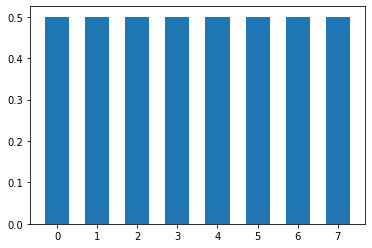

In [43]:
import matplotlib.pyplot as plt
x=np.array(df_mat['toss_winner'])
plt.bar(x,.5,0.6)

<BarContainer object of 756 artists>

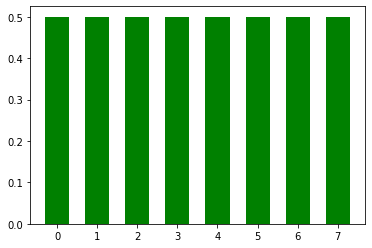

In [44]:
import matplotlib.pyplot as plt
x=np.array(df_mat['team1'])
plt.bar(x,.5,0.6,color='green')

<BarContainer object of 756 artists>

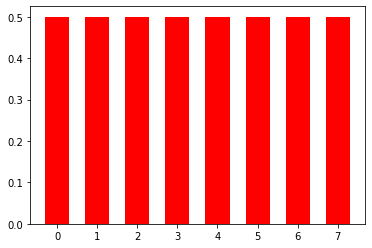

In [45]:
import matplotlib.pyplot as plt
x=np.array(df_mat['team2'])
plt.bar(x,.5,0.6,color='red')

<BarContainer object of 756 artists>

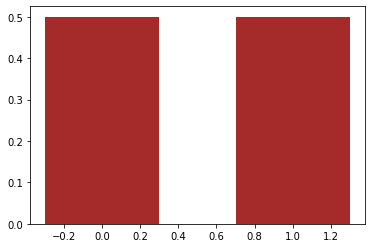

In [46]:
import matplotlib.pyplot as plt
x=np.array(df_mat['toss_decision'])
plt.bar(x,.5,0.6,color='brown')

<BarContainer object of 756 artists>

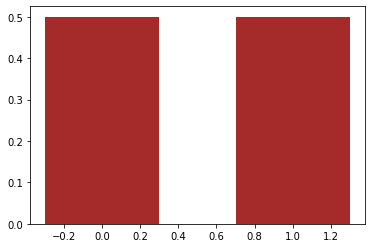

In [47]:
import matplotlib.pyplot as plt
x=np.array(df_mat['dl_applied'])
plt.bar(x,.5,0.6,color='brown')

<BarContainer object of 756 artists>

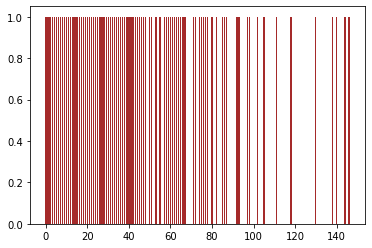

In [48]:
import matplotlib.pyplot as plt
x=np.array(df_mat['win_by_runs'])
plt.bar(x,1,0.6,color='brown')

<BarContainer object of 756 artists>

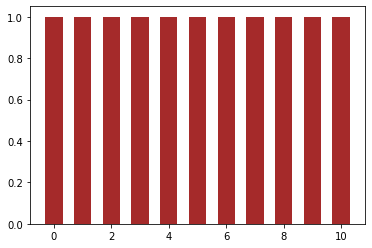

In [49]:
import matplotlib.pyplot as plt
x=np.array(df_mat['win_by_wickets'])
plt.bar(x,1,0.6,color='brown')

In [50]:
print("Chennai Super Kings-0 \n Delhi Capitals-1 \n Mumbai Indians-2\n Rajasthan Royals-3 \n Royal Challengers Bangalore-4 \n Kolkata knight riders-5 \n Kings XI punjab-6 \n Sun Risers Hyderabad-7 \n Field-0 \n Bat-1 ")
x=int(input("Team 1 code-"))
y=int(input("Team 2 code-"))
z=int(input("toss winner team code-"))
w=int(input("decision by team code-"))
w1=int(input("is dl applied?-"))
w2=int(input("runs by which win-"))
w3=int(input("wickets by which win-"))

winner=rt.predict([[x,y,z,w,w1,w2,w3]])
if winner==([0]):
  print("Chennai super Kings will win")
elif winner==([1]):
  print("Delhi Capitals will win")
elif winner==([2]):
  print("Mumbai Indians will win")
elif winner==([3]):
  print("Rajasthan Royals will win")
elif winner==([4]):
  print("Royal Challengers Bangalore will win")
elif winner==([5]):
  print("Kolkata Knight Riders will win")
elif winner==([6]):
  print("Kings XI Punjab will win")
else:
  print("Sun Risers Hyderabad will win")


Chennai Super Kings-0 
 Delhi Capitals-1 
 Mumbai Indians-2
 Rajasthan Royals-3 
 Royal Challengers Bangalore-4 
 Kolkata knight riders-5 
 Kings XI punjab-6 
 Sun Risers Hyderabad-7 
 Field-0 
 Bat-1 
Team 1 code-7
Team 2 code-2
toss winner team code-2
decision by team code-1
is dl applied?-0
runs by which win-68
wickets by which win-3
Mumbai Indians will win
